In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
# !wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

# !curl https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsN

In [3]:
df= pd.read_csv("data.csv")

In [4]:
df.head()

,Unnamed: 0.1,Unnamed: 0,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
0,0,0,HP,Victus 15-fb0157AX Gaming Laptop,49900,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8GB,DDR4,512GB,SSD,4GB AMD Radeon RX 6500M,15.6,1920.0,1080.0,Windows 11 OS,1
1,1,1,HP,15s-fq5007TU Laptop,39900,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1
2,2,2,Acer,One 14 Z8-415 Laptop,26990,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8GB,DDR4,512GB,SSD,Intel Iris Xe Graphics,14.0,1920.0,1080.0,Windows 11 OS,1
3,3,3,Lenovo,Yoga Slim 6 14IAP8 82WU0095IN Laptop,59729,66.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16GB,LPDDR5,512GB,SSD,Intel Integrated Iris Xe,14.0,2240.0,1400.0,Windows 11 OS,1
4,4,4,Apple,MacBook Air 2020 MGND3HN Laptop,69990,69.323529,Apple M1,Octa Core (4P + 4E),8GB,DDR4,256GB,SSD,Apple M1 Integrated Graphics,13.3,2560.0,1600.0,Mac OS,1


In [5]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,price,spec_rating,display_size,resolution_width,resolution_height,warranty
count,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000
mean,467.135498,521.382979,79907.409854,69.379026,15.173751,2035.393057,1218.324748,1.079507
std,270.209769,299.916605,60880.043823,5.541555,0.939095,426.076009,326.756883,0.326956
min,0.000000,0.000000,9999.000000,60.000000,11.600000,1080.000000,768.000000,0.000000
25%,235.000000,265.000000,44500.000000,66.000000,14.000000,1920.000000,1080.000000,1.000000
50%,467.000000,531.000000,61990.000000,69.323529,15.600000,1920.000000,1080.000000,1.000000
75%,702.000000,784.000000,90990.000000,71.000000,15.600000,1920.000000,1200.000000,1.000000
max,930.000000,1019.000000,450039.000000,89.000000,18.000000,3840.000000,3456.000000,3.000000


In [7]:
cdf = df[['spec_rating','display_size','resolution_width','price']]
cdf.head(10)

,spec_rating,display_size,resolution_width,price
0,73.000000,15.6,1920.0,49900
1,60.000000,15.6,1920.0,39900
2,69.323529,14.0,1920.0,26990
3,66.000000,14.0,2240.0,59729
4,69.323529,13.3,2560.0,69990
5,62.000000,14.0,1920.0,39990
6,60.000000,15.6,1920.0,36790
7,63.000000,15.6,1920.0,76990
8,64.000000,15.6,1920.0,48990
9,68.000000,13.3,1080.0,74990


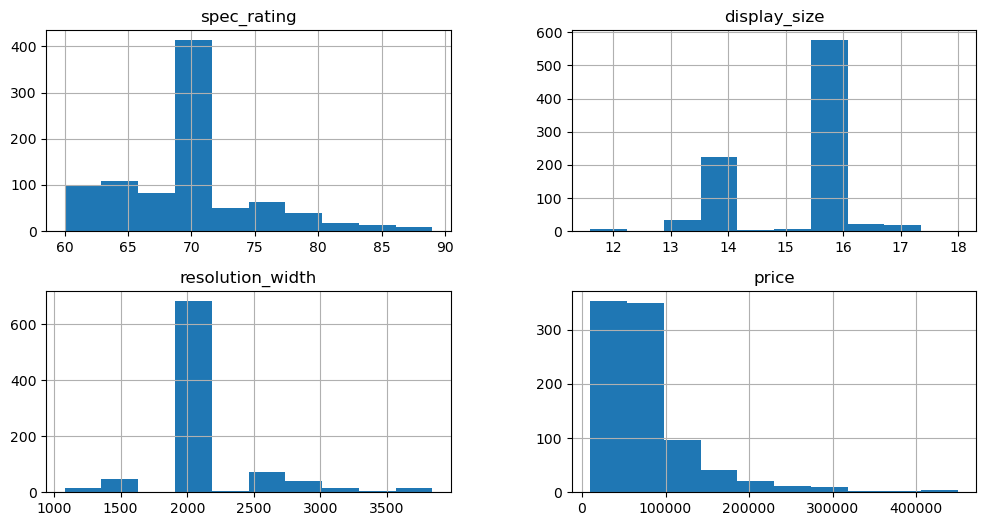

In [8]:

cdf = df[['spec_rating','display_size','resolution_width','price']]
cdf.head(10)
plt.rcParams['figure.figsize'] = (12,6)

viz = cdf[['spec_rating','display_size','resolution_width','price']]
viz.hist()
plt.show()

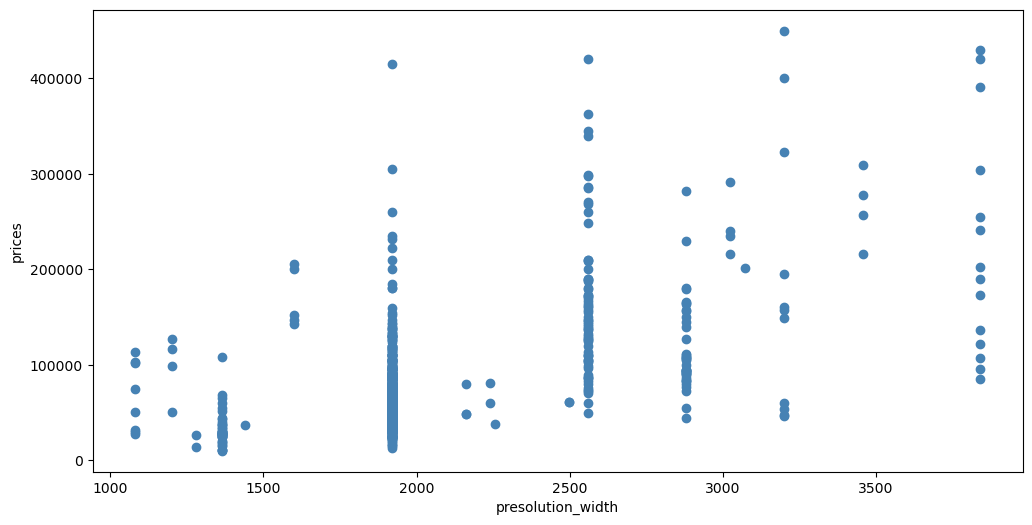

In [9]:
plt.scatter(cdf.resolution_width, cdf.price, color="steelblue")
plt.xlabel("presolution_width")
plt.ylabel("prices")
plt.show()

<Axes: xlabel='resolution_width', ylabel='price'>

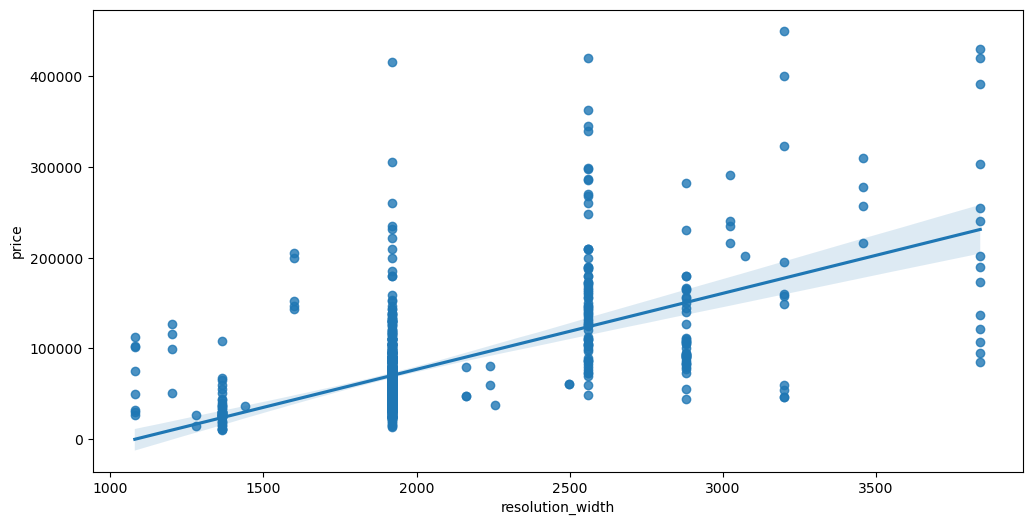

In [10]:
import seaborn as sns

sns.regplot(x=df['resolution_width'], y=df['price'])

In [11]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

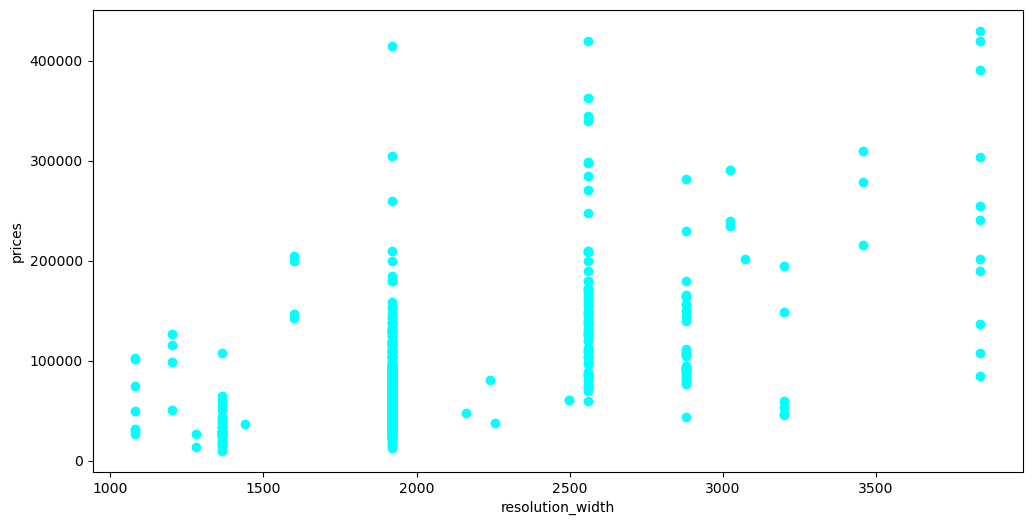

In [12]:
plt.scatter(train.resolution_width, train.price, color="cyan")
plt.xlabel("resolution_width")
plt.ylabel("prices")
plt.show()

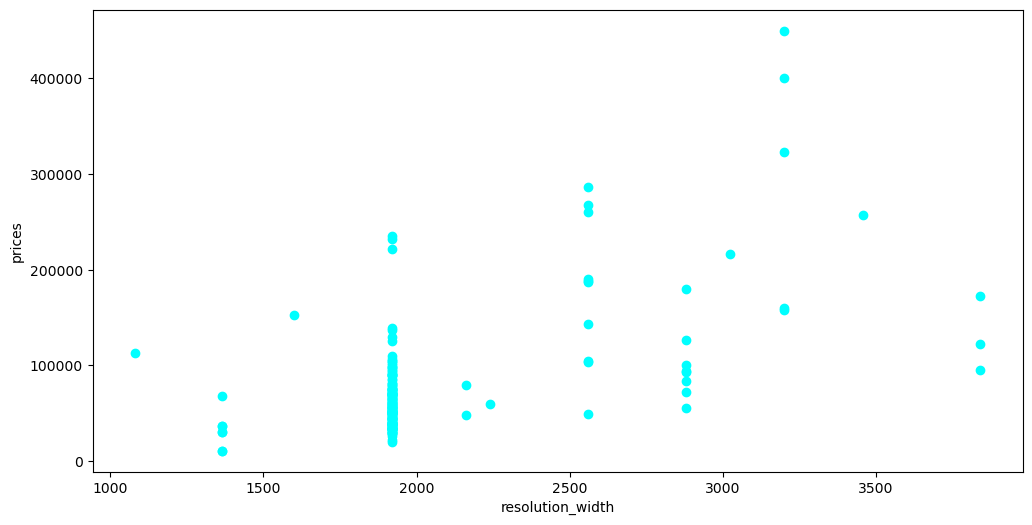

In [13]:
plt.scatter(test.resolution_width, test.price, color="cyan")
plt.xlabel("resolution_width")
plt.ylabel("prices")
plt.show()

In [14]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['resolution_width']])
train_y = np.asanyarray(train[['price']])

regr.fit(train_x, train_y)

LinearRegression()

In [15]:

print(regr.coef_) # θ1
print(regr.intercept_) # θ0

[[82.67521014]]
[-88107.14773703]


Text(0, 0.5, 'price')

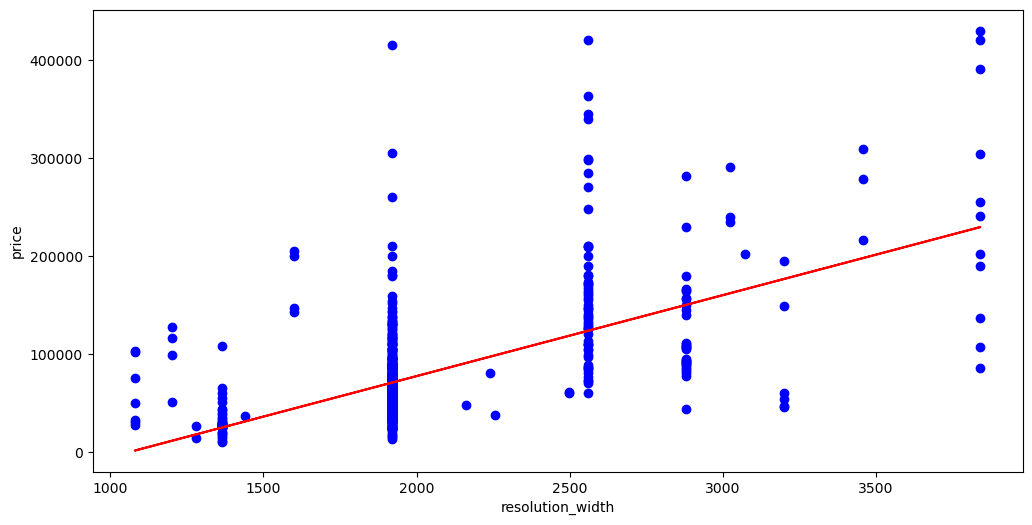

In [16]:
plt.scatter(train.resolution_width, train.price, color="blue")
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("resolution_width")
plt.ylabel("price")

In [17]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['resolution_width']])
test_y = np.asanyarray(test[['price']])
test_y_ = regr.predict(test_x)

In [18]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 34597.80
Residual sum of squares (MSE): 2773967035.83
R2-score: 0.34


### Multiple Linear Regression 

In [22]:
cdf = df[['spec_rating','display_size','Ram','resolution_height','resolution_width','price']]

In [23]:

cdf.head()


,spec_rating,display_size,Ram,resolution_height,resolution_width,price
0,73.000000,15.6,8GB,1080.0,1920.0,49900
1,60.000000,15.6,8GB,1080.0,1920.0,39900
2,69.323529,14.0,8GB,1080.0,1920.0,26990
3,66.000000,14.0,16GB,1400.0,2240.0,59729
4,69.323529,13.3,8GB,1600.0,2560.0,69990


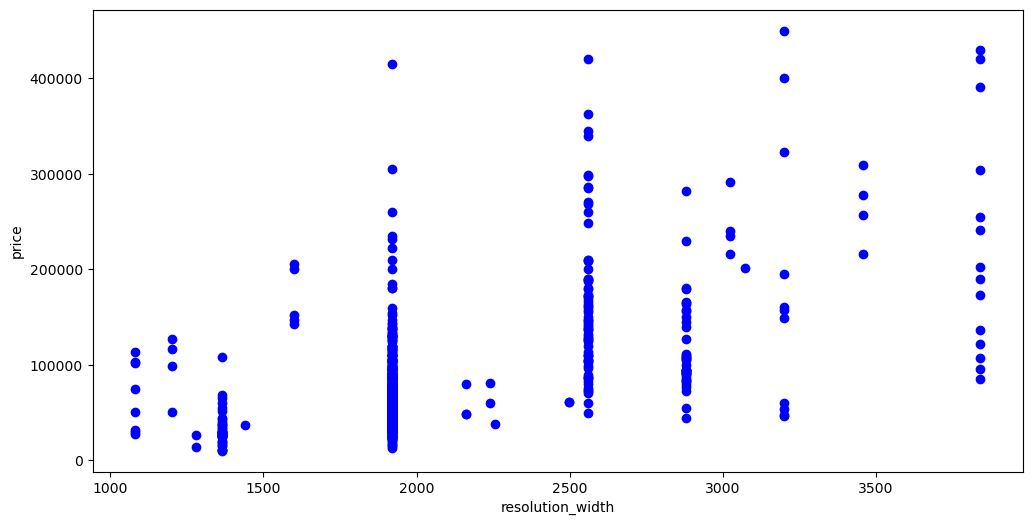

In [25]:
plt.scatter(cdf.resolution_width, cdf.price,  color='blue')
plt.xlabel("resolution_width")
plt.ylabel("price")
plt.show()

In [26]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

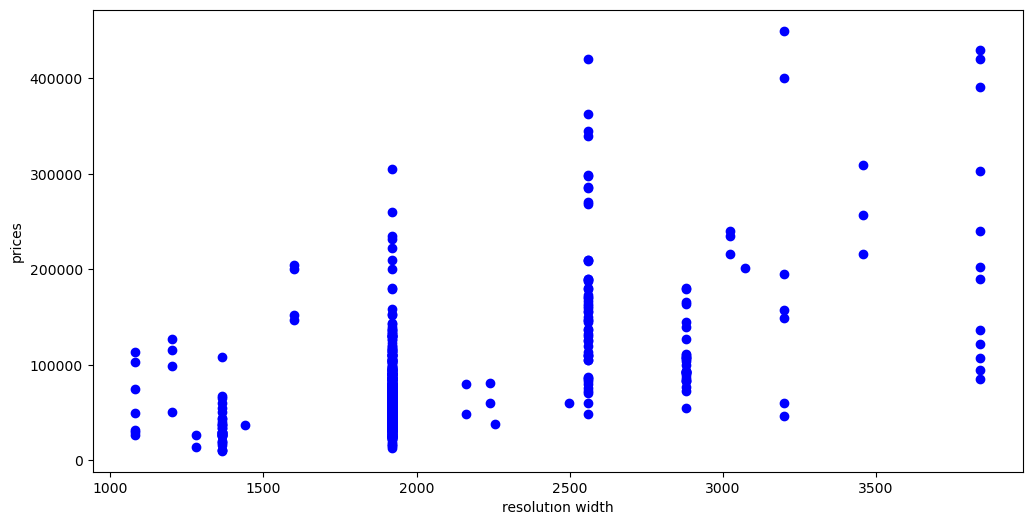

In [27]:
plt.scatter(train.resolution_width, train.price,  color='blue')
plt.xlabel("resolutıon width")
plt.ylabel("prices")
plt.show()

In [31]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['resolution_width','display_size','price']])
y = np.asanyarray(train[['price']])

regr.fit(x, y)

LinearRegression()

In [32]:

print('Coefficients:', regr.coef_)

Coefficients: [[-9.51583504e-14  1.22267479e-11  1.00000000e+00]]


In [34]:
# Prediction

y_hat = regr.predict(np.asanyarray(test[['resolution_width','display_size','price']]))
x = np.asanyarray(test[['resolution_width','display_size','price']])
y = np.asanyarray(test[['price']])

print("Mean Squared Error (MSE) : %.5f"
      % np.mean((y_hat - y) ** 2))

print('Variance score: %.5f' % regr.score(x, y)) # explained variance, best score is 1.0

Mean Squared Error (MSE) : 0.00000
Variance score: 1.00000


In [38]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['resolution_width','display_size','spec_rating','resolution_height']])
y = np.asanyarray(train[['price']])
regr.fit (x, y)
print ('Coefficients: ', regr.coef_)
y_= regr.predict(np.asanyarray(test[['resolution_width','display_size','spec_rating','price']]))
x = np.asanyarray(test[['resolution_width','display_size','spec_rating','resolution_height']])
y = np.asanyarray(test[['price']])
print("Mean Squared Error (MSE): %.5f"% np.mean((y_ - y) ** 2))
print('Variance score: %.5f' % regr.score(x, y))

Coefficients:  [[  37.46665438 6168.53064442 4093.48812857   52.69931256]]
Mean Squared Error (MSE): 29277856650682.54297
Variance score: 0.48298
